Wintersemester 2021/2022

# mug121 - Wissenschaftliche Datenverarbeitung: Python-Einführung – Notebook 3 - Einstieg in die Datenverarbeitung

> Niklas Heidemann (heidemann@geo.uni-bonn.de)<br>
> Anna Zoporowski (zoporowski@geo.uni-bonn.de)

---
---

## Weiterer Ablauf: 

* Anwendung auf Daten (Import, Export, Prozessierung, Darstellung)


* Objektorientiertes Programmieren (Klassen `class`) und eigene Bibliotheken 



----
----
> ## Erinnerung: Modularisierung
> 
> ### Globale Module - Import von Bibliotheken
> 
> ```python
> # Import der gesamten Bibliothek:
> import bibliothek
> import bibliothek as kürzel
> # Import einzelner Funktionen:
> from bibliothek import funktion
> from bibliothek import funktion as kürzel
> ```
> 
> möglichst vermeiden:
> 
> ```from bibliothek import *```
> 
> * **!! importiert alle Funktionen des Moduls `bibliothek` und überschreibt / konkurriert mit build-in Funktionen !!**
> 
> ### Funktionsaufruf
> 
> Funktionsaufruf je nach Import mit `bibliothek.funktion()` bzw. `kürzel.funktion()`, `funktion()` oder `kürzel()`
> 

### Lokale Module - Import von lokalen Paketen

* eigene Funktionen oder Klassen lassen sich in `.py`-Dateien oder `.ipynb`-Notebooks ablegen
* Import von `name.py`  wie unter [Globale Module](#Globale-Module---Import-von-Bibliotheken "Kapitel 'Globale Module'") z.B. mit 

```python
import name as kürzel
```


* Funktionsaufruf wie gewohnt mit `name.funktion()`, bzw. `kürzel.funktion()`
* Funktionsnamen sind *case-sensitiv* (Groß- und Kleinschreibung wird beachtet)

**Ladereihenfolge: global oder lokal** - welches zuerst?

1. lokale Module
2. globale Module
3. falls weder lokale noch globale Module unter verwendetem Namen gefunden werden können: "ModuleNotFoundError"

----

In [1]:
# Codezeile zum Testen



----

**Aufgabe 0:**

Importieren Sie Ihre eigene kleine Python-Library:

* Sie haben eine Python-Datei nach dem Schema `library_name.py` erstellt oder vorliegen.
* Legen Sie diese Datei im gleichen Verzeichnis auf der gleichen Ebene ab, in der Sie auch dieses Notebook ausführen.
* Nutzen Sie den Befehl <br>

    ```python 
    import library_name
    ``` 
    <br>
    oder eine Variante (siehe oben).
    Damit importieren Sie die Library als lokales Modul.
* Rufen Sie Funktionen des Moduls mit 
    
    ```python 
    library_name.funktionsname()
    ``` 
    <br>
    auf.
    

Vervollständigen Sie künftig dieses Modul mit allen selbstgeschriebenen Funktionen, die allgemeingültig und/oder für spezielle Anwendungen genutzt werden können. 

**Hinweis:**

Bevor das Modul und etwaige Änderungen an der `.py`-Datei (denken Sie an Speichern `Strg. + S`) geladen werden können, muss nicht nur der Import-Befehl neu ausgeführt werden, sondern auch der Kernel neu gestartet werden. Verwenden Sie hierfür der Einfachheit halber `Run -> Restart Kernel and Run All Cells`.

Außerdem: Hier bietet es sich an, dieses Notebook und Ihre `.py`-Datei nebeneinander im Jupyter Lab zu öffnen.

Container-Info:
 [[123   2   3]
 [  4   5   6]
 [110 112   0]] 
 des Typs: <class 'numpy.ndarray'> 
 mit Anzahl Einträge: 3


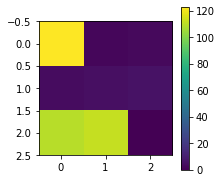

In [2]:
# Codezeile Aufgabe

import njhlib as njh
import matplotlib.pyplot as plt
import numpy as np
a = np.array([[123, 2, 3], [4, 5, 6], [110, 112, 0]])

njh.print_container(a)
njh.plot_matrix(a)

----
----

    

## **Import von Daten-Dateien**

### Build-in

```python
data_py = open("XXX.txt", "r")
# als String, Liste, Tupel etc.
```

### NumPy

```python
import numpy as np
data_np = np.loadtxt("XXX.txt")
# als Daten-NumPy-ndarray
```

### Pandas

```python
import pandas as pd
data_pd = pd.read_csv("XXX.csv")
# als Pandas-DataFrame
```


### Pickle (ganze Objekte importieren)

```python
import pickle
with open("XXX.pickle", "rb") as file:
    data_pickle = pickle.load(file)
# als Objekt
```

-----

## **Export von Daten-Dateien**

### Build-in

```python
f = open("XXX.txt", "w+") # file öffnen
print(data_py.read(), file=f) # Inhalt hineinschreiben
f.close() # file schließen
```

### NumPy

```python
import numpy as np
np.savetxt("XXX.txt", data_np) # ndarray als .txt speichern
```

### Pandas

```python
import pandas as pd
data_pd.to_csv("XXX.csv") # DataFrame als .csv speichern
```


### Pickle (ganze Objekte exportieren/Backup)

```python
import pickle

with open("XXX.pickle", "wb") as file:
    pickle.dump(data_pickle, file)
# ganzes Objekt abspeichern
```
---

In [3]:
# Codezeile zum Testen

data = [] # leere Liste
print("Datentyp:", type(data))
print("Inhalt:", data)

print("EXPORT:")

import pickle
with open("test12345.pickle", "wb") as f:
    pickle.dump(data, f)
    

Datentyp: <class 'list'>
Inhalt: []
EXPORT:


In [4]:
with open("test12345.pickle", "rb") as f:
    data_test = pickle.load(f)

print("Import als:", type(data_test))
print("Inhalt:", data_test)
print("\nWar vor Export:")
print("Datentyp:", type(data))
print("Inhalt:", data)

Import als: <class 'list'>
Inhalt: []

War vor Export:
Datentyp: <class 'list'>
Inhalt: []


In [5]:
# Codezeile zum Testen

import pandas as pd

freq = pd.read_csv("homework/f26_spektrum.txt", names=["freq"])

print(freq.shape)
# print(freq)

(54, 1)


---
**Aufgabe 1: Eigener Datensatz aus Hausaufgabe 04**

1. Kopieren Sie Ihren Datensatz in die folgende Zeile, den Sie in Aufgabe 4 der Hausaufgabe 4 erstellt haben.
    Nutzen Sie alternativ den folgenden Datensatz:

    ```python
    data = {"Bonn":[1, 2, 3], "Köln":[2, 3, 2]}
    ```
    <br>
2. Geben Sie die Werte von beiden Spalten mit entsprechender Benennung und übersichtlicher Formatierung mithilfe eines ```print```-Befehls aus.

3. Schreiben Sie die gleiche Ausgabe in eine Datei im Pfad ```data/dataset_cities.txt```.

4. Plotten Sie beide Wertereihen für die Städte als zwei Linien in einen Plot. Ergänzen Sie Ihren Plot durch Label an Achsen und Linien, schalten Sie ein Grid ein, plotten Sie eine Legende.<br>
    Hinweis: `plt.grid()`, `plt.legend()` sowie `label` als Argument in `plt.plot()`, `plt.xlabel()` und `plt.ylabel()`.

5. Speichern Sie den Plot als Bilddatei im Ordner ``img/dataset_cities.jpg``.


Hinweis: Trennen Sie die Zelle ggf..

In [6]:
# Codezeile Aufgabe

data = {"Bonn":[1, 2, 3], "Köln":[2, 3, 2]}

# Ausgabe
print( """# Eigener Datensatz aus Hausaufgabe 04 \n\n#Wertereihe Stadt 1: \n{} \n\n#Wertereihe Stadt 2: \n{}""".format(data["Bonn"], data["Köln"], "!", ) # 
     )

# Eigener Datensatz aus Hausaufgabe 04 

#Wertereihe Stadt 1: 
[1, 2, 3] 

#Wertereihe Stadt 2: 
[2, 3, 2]


In [7]:
# np.savetxt("data/dataset_cities.txt", np.array([data["Bonn"], data["Köln"]])) # nur für array sinnvoll

f = open("data/dataset_cities.txt", "w+") # file öffnen
print("""# Eigener Datensatz aus Hausaufgabe 04 \n\n#Wertereihe Stadt 1: \n{} \n\n#Wertereihe Stadt 2: \n{}""".format(data["Bonn"], data["Köln"], "!"), file=f) # Inhalt hineinschreiben
f.close() # file schließen

# format-Methode
# "abc".format()

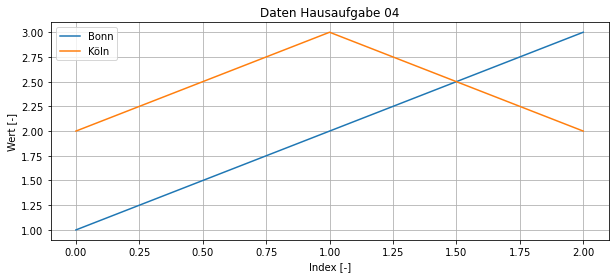

In [8]:
plt.figure(figsize=(10, 4)) # Initialisierung der Figure

# erste Stadt plotten
plt.plot(data["Bonn"], label=list(data.keys())[0]) # allgemeingültig über Keys
# plt.plot(data["Bonn"], label="Stadt1") # "hard-coded" als String
# zweite Stadt plotten
plt.plot(data["Köln"], label=list(data.keys())[1])
# plt.plot(data["Köln"], label="Stadt2")

plt.legend() # Legende
plt.xlabel("Index [-]") # Label der x-Achse
plt.ylabel("Wert [-]") # Label der y-Achse

plt.grid() # Gitter
plt.title("Daten Hausaufgabe 04") # Titel

plt.savefig("img/dataset_cities.jpg")#, bbox_inches="tight") # Speichern/Export als jpg
plt.show() # Abschluss Plot

----
----
> ### Regression
> 
> Wichtige Funktionen für Regressionen:
> 
> ```python
> np.polyfit() # Fit von Polynomen von Grad n
> np.polyval() # entsprechende Werteverteilung
> 
> ```
> 
> Andere Bibliotheken:<br>
> beispielsweise
> 
> ```python
> scipy.stats.linregress() # lineare Regression
> 
> ```



----
**Aufgabe 2: Punktewolke fitten**

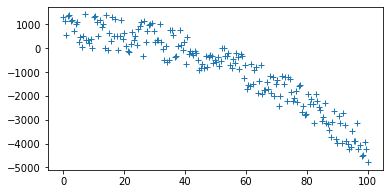

In [9]:
# gegeben Beginn
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

def poly(x):
    return - 0.5 * x**2 + 0.3 * x + 10

_data_x = np.linspace(0, 100, 200)
_noise = np.random.randint(0, 1500, 200)

_data_y = poly(_data_x) + _noise

plt.figure(figsize=(6, 3))
plt.plot(_data_x, _data_y, "+")
plt.show()

data = np.stack((_data_x, _data_y), axis=1)
filename = "data/polydata_wissdv.dat"
infos = "# x, y (Datensatz zum Testen von Fits höheren Grades in WissDV WiSe20212022)"
np.savetxt(filename, data, 
           header=infos, )
# gegeben Ende

0. Führen Sie die gegebene Zelle aus.
1. Öffnen Sie die Ascii-Datei `data/polydata_wissdv.dat` händisch und sehen Sie sich den Datensatz an.
2. Importieren Sie den Datensatz, indem sie die Ascii-Datei `data/polydata_wissdv.dat` laden und den Inhalt als Variable speichern.
3. Plotten Sie die Daten.
4. Führen Sie einen Fit durch. Verwenden Sie eine beliebige Fit-Funktion (bspw. `np.polyfit`).
5. Plotten Sie die Originaldaten, sowie den Fit.
6. Speichern Sie das gefittete Modell mithilfe von `np.savetxt` in eine Datei im Ordner `data` (Hinweis: `np.column_stack()`).

In [10]:
# Codezeile Aufgabe

data = np.loadtxt("data/polydata_wissdv.dat")
print(data[:10])

x = data[:, 0]
y = data[:, 1]

print(x[:10])
print(y[:10])

[[0.00000000e+00 1.29900000e+03]
 [5.02512563e-01 1.15902449e+03]
 [1.00502513e+00 5.36796470e+02]
 [1.50753769e+00 1.35331593e+03]
 [2.01005025e+00 1.40158286e+03]
 [2.51256281e+00 1.15459728e+03]
 [3.01507538e+00 1.18635918e+03]
 [3.51758794e+00 7.37868564e+02]
 [4.02010050e+00 1.03512543e+03]
 [4.52261307e+00 1.09812977e+03]]
[0.         0.50251256 1.00502513 1.50753769 2.01005025 2.51256281
 3.01507538 3.51758794 4.0201005  4.52261307]
[1299.         1159.02449433  536.79646979 1353.31592637 1401.58286407
 1154.5972829  1186.35918285  737.86856393 1035.12542613 1098.12976945]


In [11]:
# Codezeile Aufgabe

df = pd.DataFrame(data, columns=["x", "y"])
print(df.head())

          x            y
0  0.000000  1299.000000
1  0.502513  1159.024494
2  1.005025   536.796470
3  1.507538  1353.315926
4  2.010050  1401.582864


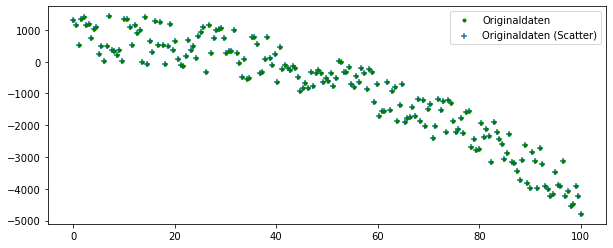

In [12]:
# Plotten

plt.figure(figsize=(10, 4))
plt.plot(x, y, label="Originaldaten", color="g", marker=".", linestyle="")
plt.scatter(x, y, label="Originaldaten (Scatter)", marker='+')
plt.legend()
plt.show()

In [13]:
# Fitten
p_1 = np.polyfit(x, y, deg=1)
p_2 = np.polyfit(x, y, deg=2)

print("Regressionsparameter:")
print("lineares Modell (deg=1):", p_1)
print("Modell zweiten Grades (deg=2):", p_2)


# Beginn Pseudeocode 
# y_neu_deg1 = Regressionsparamter * x-Werte = p_1[0] * x**1 + p_1[1] * x**0
# y_neu_deg2 = Regressionsparamter * x-Werte = p_2[0] * x**1 + p_2[1] * x**1 + p_2[2] * x**0
# Ende Pseudocode

model_1 = np.polyval(p_1, x)
model_2 = np.polyval(p_2, x)

print(model_1)
print(model_2)

Regressionsparameter:
lineares Modell (deg=1): [ -50.51293731 1655.99259431]
Modell zweiten Grades (deg=2): [-5.24707872e-01  1.95784992e+00  7.85874012e+02]
[ 1655.99259431  1630.60920873  1605.22582315  1579.84243756
  1554.45905198  1529.07566639  1503.69228081  1478.30889522
  1452.92550964  1427.54212405  1402.15873847  1376.77535288
  1351.3919673   1326.00858171  1300.62519613  1275.24181055
  1249.85842496  1224.47503938  1199.09165379  1173.70826821
  1148.32488262  1122.94149704  1097.55811145  1072.17472587
  1046.79134028  1021.4079547    996.02456911   970.64118353
   945.25779794   919.87441236   894.49102678   869.10764119
   843.72425561   818.34087002   792.95748444   767.57409885
   742.19071327   716.80732768   691.4239421    666.04055651
   640.65717093   615.27378534   589.89039976   564.50701418
   539.12362859   513.74024301   488.35685742   462.97347184
   437.59008625   412.20670067   386.82331508   361.4399295
   336.05654391   310.67315833   285.28977274   25

$$y = a_2 \cdot x^2 + a_1 \cdot x^1 + a_0 \cdot x^0 = a_2 \cdot x^2 + a_1 \cdot x + a_0$$

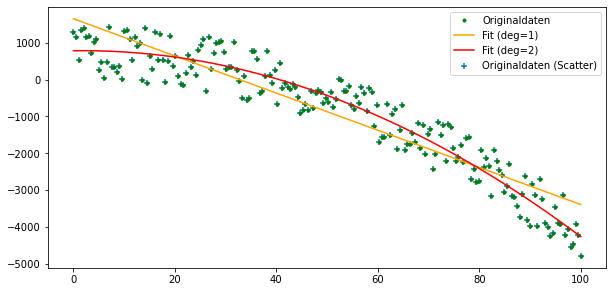

In [14]:
plt.figure(figsize=(25/2.5, 12/2.5))
plt.plot(x, y, label="Originaldaten", color="g", marker=".", linestyle=" ")
plt.scatter(x, y, label="Originaldaten (Scatter)", marker="+")
plt.plot(x, model_1, label="Fit (deg=1)", color="orange", marker="")
plt.plot(x, model_2, label="Fit (deg=2)", color="r", marker="")
plt.legend()
plt.show()

In [15]:
np.savetxt("data/reg_model_1.txt", np.column_stack((x, model_1)))
np.savetxt("data/reg_model_2.txt", np.column_stack((x, model_2)))

----
----
## Struktur unserer Ablage (Repository)

* Verzeichnis `data` zur Ablage von Datendateien für Import und Export
* Verzeichnis `img` zur Ablage von Abbildungen, Plots
  * Unterverzeichnis `scr` ist als Source-Verzeichnis für Abbildungen gedacht, die mit dem Notebook geladen werden (DoNotTouch)
  

----
----
## Der Datensatz

![schaubild](img/scr/datenverarbeitung_schaubild.jpg)

----
----
## Datensatz: Erstellen

* Aus einer Datendatei laden
* ggf. Umwandeln
* Aus Funktion, Berechnung, Programm übernehmen
* Selbst erzeugen
* Abspeichern, Ablage, Dokumentation, Backup


----
----
## Datensatz: Prozessieren

### Formatierung

* In ein bearbeitbares Format bringen (bspw. von binär zu ASCII)
* In eine verständliche Form bringen / Überblick verschaffen (Datensatz separieren, verkleinern)
* In diesem Format zwischenspeichern


### Berechnung

* Berechnung neuer Werte
* Statistik
* Fitting
* Zeitreihenanalyse
* Filterung
* Konvertierung von Daten

### Weitergabe

* Abspeichern
* Bereitstellen unter festgelegtem Pfad
* Dokumentieren
* (Neu-)Laden


----
----
## Datensatz: Darstellen und Interpretieren

### Darstellung

* Plot-Programm
* Rohdaten / bearbeitete Daten
* Vergleiche
* absolute / relative Werte


### Interpretation

* Wertebereiche darstellen/markieren
* Trends
* Umrechnungen
* Vergleiche

----
----

**Aufgabe 3: Daten Labor - "Reparatur" und Aufbereitung**

Im Ordner `data` liegt eine Datenbank-Datei `131_20210302T000000_A.DBD`. Aus dieser Datenbank-Datei wurde mithilfe des C++-Tools Dumb_DBD (`tools/dumb_dbd_v13/`) eine Textdatei `data/temp.txt` mit lesbaren Daten erzeugt.

1. Sehen Sie sich die Datei `data/temp.txt` an. Um welche Daten handelt es sich bei dem Datensatz? Was fällt Ihnen sonst noch auf?

In [16]:
# Antwortzeile Aufgabe

# Spalten: Zeitstempel, Temperaturdaten, Spannungsmessungen (2 Spalten)
# Sprung bei Index 29735 auf 29736 von 28.09.2020 auf 01.01.1989.
# Datensatz muss beginnend vom letzten Zeitstempel (2021/03/02 00:00:00.0106) rückwirkend korrigiert werden

Leider ist der Datenlogger aufgrund eines Stromausfalls an einem bestimmten Zeitpunkt ausgefallen. Dieser Zeitpunkt lässt sich auf den 28.09.2020 nach 02:40 Uhr feststellen. Danach wurde der Zeitstempel der Messungen leider für einige Zeit auf 1989 zurückgesetzt.

Der folgende Code lädt und behebt das Problem:

In [17]:
# # gegeben Beginn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

temp_log = pd.read_csv("data/temp.txt", skiprows=23, parse_dates=True)
print("DataFrame:\n {}\n\nmit fehlerhaftem Zeitstempel: \n{}".format( temp_log, temp_log[29735:].head() ))

# Index, ab dem der Zeitstempel nicht mehr stimmt: 29736
print("""\nIndex, ab dem der Zeitstempel nicht mehr stimmt: 29736\n""")

times = temp_log[29736:].copy()

times['CT'] = [pd.to_datetime(i) for i in pd.date_range(start = pd.to_datetime(temp_log["Timestamp"][int(len(temp_log["Timestamp"])-1)]), 
                                                        periods = len(times), freq = '-10T')[::-1]]
temp_log['Timestamp'][29736:] = times['CT']

print("'reparierter' Zeitstempel: \n{}".format( temp_log[29735:].head() ))

temp_log.index = pd.to_datetime(temp_log["Timestamp"])

# # gegeben Ende

DataFrame:
                       Timestamp  1PT385 (degC) 3*V (mV) 3+V (mV)
0      2020/03/05 14:50:00.0150           24.9    329.2    338.8
1      2020/03/05 15:00:00.0164           24.8    232.7    329.6
2      2020/03/05 15:10:00.0018           24.7    327.1    339.4
3      2020/03/05 15:20:00.0038           24.5    182.7    304.7
4      2020/03/05 15:30:00.0006           24.7    188.6    308.3
...                         ...            ...      ...      ...
52014  2021/03/01 23:20:00.0027           24.1    441.9    342.0
52015  2021/03/01 23:30:00.0042           24.1    433.2    341.9
52016  2021/03/01 23:40:00.0063           24.1    440.4    341.9
52017  2021/03/01 23:50:00.0082           24.1    438.7    342.0
52018  2021/03/02 00:00:00.0106           24.0    439.8    342.0

[52019 rows x 4 columns]

mit fehlerhaftem Zeitstempel: 
                      Timestamp  1PT385 (degC) 3*V (mV) 3+V (mV)
29735  2020/09/28 02:40:00.0046           28.8    396.3    326.6
29736  1989/01/01 00

/srv/conda3/envs/py3-general/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
# Listcomprehension ist eine effektive Möglichkeit, 
# eine eine Schleife innerhlab eines Listenaufrufs zu nutzen um dabei eine Liste zu erzeugen.
# Folgender Vergleich zeigt die Funktionsweise 
# erst als for-Schleife und danach als Schleife innerhalb der Comprehension.

xyz = [0, 1, 2]

data_forloop = []
for i in xyz:
    data_forloop.append(i+1)
print("Liste erzeugt mit for-Schleife:", data_forloop)

data_listcomprehension = [i+1 for i in xyz]
print("Liste erzeugt mit Listcomprehension:", data_listcomprehension)

Liste erzeugt mit for-Schleife: [1, 2, 3]
Liste erzeugt mit Listcomprehension: [1, 2, 3]


2. Plotten Sie die Hauptinformation (Spalte "1PT385 (degC)" des DataFrames).
3. Berechnen Sie die rollenden Mittelwerte für die folgenden Zeitfenster und speichern Sie sie in zwei Variablen:

    a) 1 Tag, also 24 Stunden ("24h"): Variable `temp_rollmean_daily`<br>
    b) 1 Woche, also 7 Tage ("7d"): Variable `temp_rollmean_weekly`
    
    Nutzen Sie dafür die Methode <br>
    `DataFrame.resample(HIER DAS ZEITFENSTER).mean().rolling(window=3, min_periods=1).mean()`
    
4. Erweitern Sie Ihren Plot aus Aufgabenteil 2 um die Mittelwerte und vervollständigen Sie den Plot!<br>
    Hinweis: `plt.grid()`, `plt.legend()` sowie `label` als Argument in `plt.plot()`, `plt.xlabel()` und `plt.ylabel()`.

5. Lassen Sie sich eine kleine Statistik mit minimalen und maximalen Werten von originalen und gemittelten Daten ausgeben.

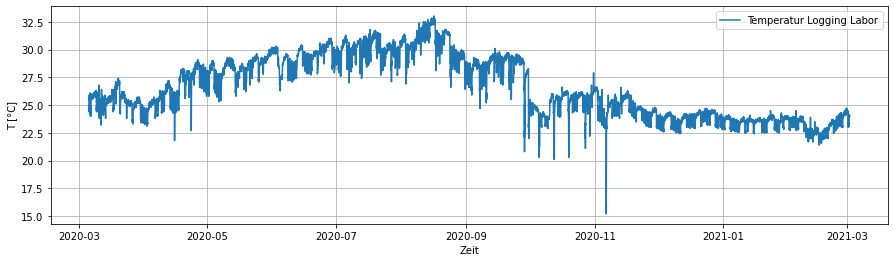

In [19]:
# Codezeile Aufgabe

plt.figure(figsize=(15, 4))
plt.plot(temp_log["1PT385 (degC)"], label="Temperatur Logging Labor", )
plt.grid()
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("T [°C]")
# plt.savefig("")
plt.show()

In [20]:
# Codezeile Aufgabe

# 24h rolling mean / moving average mit Fensterbreite 3
temp_rollmean_daily = temp_log.resample("24h").mean().rolling(window=3, min_periods=1).mean()
# 7d rolling mean / moving average mit Fensterbreite 3
temp_rollmean_weekly = temp_log.resample("7d").mean().rolling(window=3, min_periods=1).mean()

print("original:", "\n min:", temp_log["1PT385 (degC)"].min(), "\n max:", temp_log["1PT385 (degC)"].max())

print("daily_mean:", "\n min:", temp_rollmean_daily["1PT385 (degC)"].min(), "\n max:", temp_rollmean_daily["1PT385 (degC)"].max())
print("weekly_mean:", "\n min:", temp_rollmean_weekly["1PT385 (degC)"].min(), "\n max:", temp_rollmean_weekly["1PT385 (degC)"].max())

original: 
 min: 15.2 
 max: 33.0
daily_mean: 
 min: 22.154166666666637 
 max: 32.289351851851855
weekly_mean: 
 min: 22.893320105820106 
 max: 31.01213624338622


6. Folgender Code berechnet den Trend des Datensatzes. Erweitern Sie Ihren Plot um den Trend. Macht die Betrachtung Sinn?

In [21]:
# # gegeben Beginn
X = np.array(pd.to_datetime(temp_log.index.values), dtype=float) # datetime-Objekt-Werte (values) wird in array verpackt
Y = np.array(temp_log["1PT385 (degC)"].dropna().values, dtype=float) # Temperaturwerte (values) werden in array verpackt
a_func = np.polyfit(x=X, y=Y, deg=1) # Parameter
trend = np.polyval(a_func, X) # Modell, Trend
# # gegeben Ende

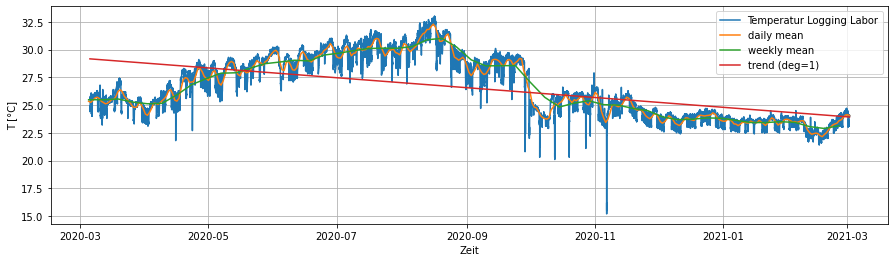

In [22]:
# Codezeile Aufgabe

plt.figure(figsize=(15, 4))
plt.plot(temp_log["1PT385 (degC)"], label="Temperatur Logging Labor", )
plt.plot(temp_rollmean_daily["1PT385 (degC)"], label="daily mean", )
plt.plot(temp_rollmean_weekly["1PT385 (degC)"], label="weekly mean", )
plt.plot(temp_log.index, trend, label="trend (deg=1)")
plt.grid()
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("T [°C]")
# plt.savefig("")
plt.show()

7. Interpretieren Sie den Datensatz unter Zuhilfenahme der vorherigen Teilaufgaben:
   
   Welche Aussagen lassen sich treffen?

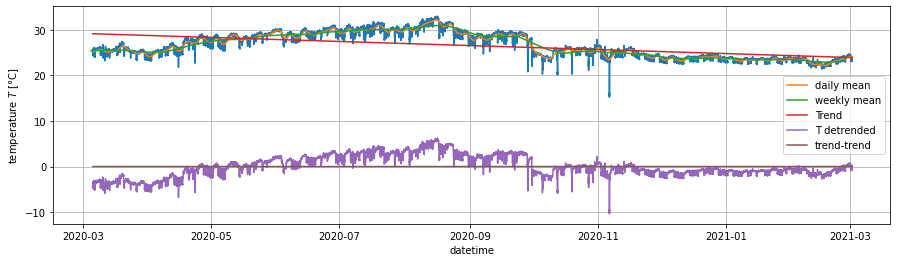

In [23]:
# Codezeile Aufgabe für zusätzliche Ausgaben

fig, ax = plt.subplots(figsize=(15, 4))

ax.plot(temp_log["1PT385 (degC)"], label="")
ax.plot(temp_rollmean_daily["1PT385 (degC)"], label="daily mean")
ax.plot(temp_rollmean_weekly["1PT385 (degC)"], label="weekly mean")

ax.plot(temp_log.index, trend, label="Trend")
ax.plot(temp_log.index, temp_log["1PT385 (degC)"] - trend, label="T detrended") # Trend wird abgezogen
ax.plot(temp_log.index, trend - trend, label="trend-trend") # Trend von Trend abgezogen = Trend vom detrended

ax.set_xlabel("datetime")
ax.set_ylabel("temperature $T$ [°C]")
ax.grid()
ax.legend(loc="best")

plt.show()

Antwortzeile Aufgabe